# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("assignment3_creditcard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

In [5]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535,0.008578
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736,0.092221
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915,0.000000
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189,0.000000
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075,0.000000
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911,0.000000
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133,1.000000


## MODEL

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
X = data.drop(["Class"], axis=1)
y = data["Class"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20074, 28) (8604, 28) (20074,) (8604,)


In [13]:
# Logistic Regression 모델 적용 
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [17]:
data['Class'].value_counts()

0    28432
1      246
Name: Class, dtype: int64

In [25]:
# class 예측
y_pred = classifier.predict(X_test)

### 성능지표

#### mean accuracy
- 정확도는 전체 샘플 중 맞게 예측한 샘플 수를 의미한다.
- 높을수록 좋은 모형이다. 
- 1에 매우 가까운 0.99 값이 나와 정확도가 높은 수준임을 알 수 있다.

In [30]:
# mean accuracy
classifier.score(X_test, y_test)



0.9977917247791724

## F1 score ## 
- 점수는 정밀도(Precision)와 재현율(Recall)의 가중조화평균(weight harmonic average)를 의미한다.
- 정밀도에 주어지는 가중치를 beta라고 한다. 
- 특히 beta가 1인 경우를 F1점수라고 한다. 
- 0과 1사이 값이며 1에 가까울수록 분류 성능이 좋음을 의미한다. 
- 0.8이상의 1에 가까운 점수가 나왔기에 분류 성능이 양호함을 알 수 있다.

In [31]:
# F1 score
from sklearn.metrics import *
f1_score(y_pred, y_test) 


0.8429752066115702

### F1 score 개선 시도 ## 
* 다른 지표들은 충분히 높은 수치라 개선하기 어려울 것이라 생각됨.
* f1 score는 정밀도와 재현율의 가중치이므로 두 지표 중 하나만 올려도 쉽게 성능 개선 가능할 것이라 생각함

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1'])) 

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      8540
     class 1       0.89      0.80      0.84        64

    accuracy                           1.00      8604
   macro avg       0.95      0.90      0.92      8604
weighted avg       1.00      1.00      1.00      8604



### 과정
- 변수가 많으므로 일단 y값과의 상관관계 파악
- 변수 중 상관관계가 유별나게 높은 변수들 발견
- 해당 변수 제외하고 회귀 돌림 -> 성능 better 예상

In [42]:
data.corr()['Class'].sort_values(ascending=False)

Class    1.000000
V11      0.341386
V4       0.298022
V2       0.230970
V21      0.112407
V19      0.086004
V20      0.045712
V27      0.042395
V28      0.032054
V8       0.028900
V26      0.012928
V25      0.010078
V23      0.010063
V15     -0.004760
V22     -0.007118
V13     -0.008053
V24     -0.020952
V6      -0.100993
V5      -0.215617
V9      -0.221992
V1      -0.241863
V18     -0.250407
V7      -0.387461
V3      -0.404299
V16     -0.410511
V10     -0.441419
V12     -0.506636
V17     -0.549825
V14     -0.571421
Name: Class, dtype: float64

In [39]:
X = data.drop(["Class","V17","V12", "V14"], axis = 1)
y = data["Class"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [41]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## 개선 결과
- precision이 93%로 4%p 상승 recall은 78%로 2%p 하락
- 상승폭이 더 커서 F1 score 개선된 것으로 보임

In [44]:
from sklearn.metrics import *
f1_score(y_pred, y_test) 

# 이전 수치: 0.8429752066115702
# 개선 수치: 0.847457627118644 

0.847457627118644

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1'])) 

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      8540
     class 1       0.93      0.78      0.85        64

    accuracy                           1.00      8604
   macro avg       0.96      0.89      0.92      8604
weighted avg       1.00      1.00      1.00      8604



#### confusion matrix(분류결과표)
- 실제 클래스와 예측된 클래스의 매칭을 이용하여 분류 모델을 평가하는 도구다.
- 샘프를 positive와 negative로 분류한다. 
- 이에 따라 TP, FP, FN, TN 네가지 경우의 수가 발생한다. 

In [27]:
confusion_matrix(y_pred, y_test)

array([[8534,   13],
       [   6,   51]], dtype=int64)

#### ROC curve 
- perfect classifier에 가까운 커브일수록 좋은 모델이다. 
- AUC = AREA UNDER CURVE: ROC 커브 면적 아래이다
- 1에 가까울수록 좋으며 현재 그래프는 PERFECT에 가까운 모양이다.

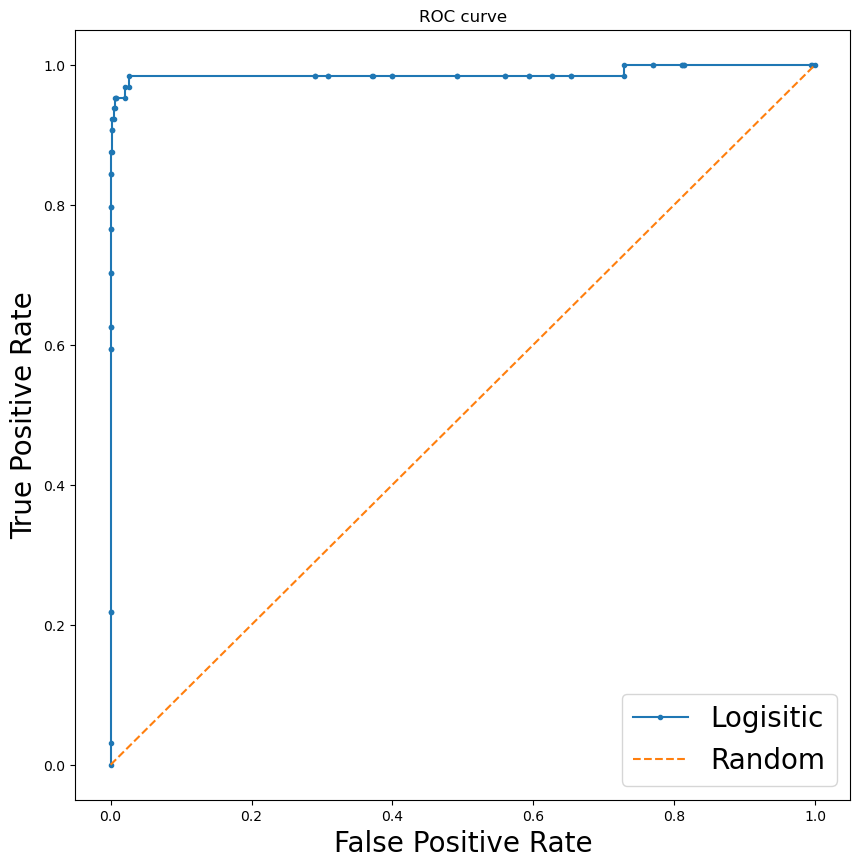

In [29]:
#X_test에 대해 y=1(유방암)일 확률
probs=classifier.predict_proba(X_test)[:,1]

#ROC curve x축, y축
classifier_fpr, classifier_tpr, threshold1=roc_curve(y_test,probs)

#random은 유방암 유무를 랜덤하게 판정한 것
random_fpr,random_tpr, threshold2=roc_curve(y_test,[0 for i in range(X_test.__len__())])

#plot
plt.figure(figsize=(10,10))
plt.plot(classifier_fpr,classifier_tpr,marker=".",label="Logisitic")
plt.plot(random_fpr,random_tpr,linestyle="--",label="Random")

#axis
plt.xlabel("False Positive Rate",size=20)
plt.ylabel("True Positive Rate",size=20)

#show the legend
plt.legend(fontsize=20)

plt.title("ROC curve")
plt.show()